#Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import sklearn

In [ ]:
print(sklearn.__version__)

1.2.2


#Loading dataset

In [ ]:
df = pd.read_csv('/content/Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


#Correlation Matrix

<ipython-input-10-a23097b78500>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  C_mat = df.corr()


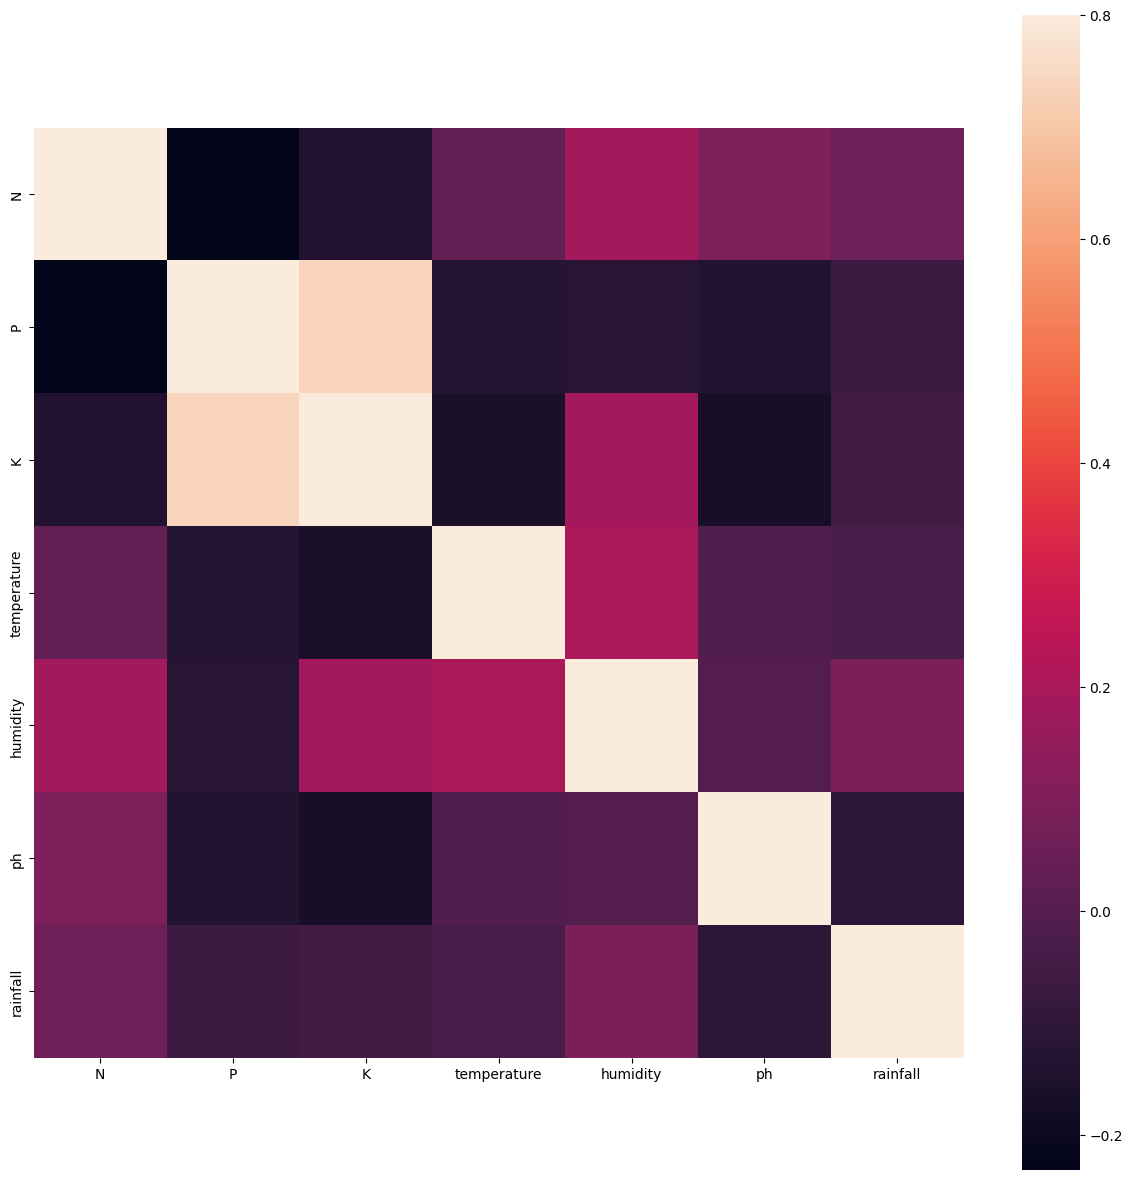

In [ ]:
C_mat = df.corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(C_mat, vmax= .8, square = True)
plt.show()

In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

#Train Test Split

In [ ]:
X = df.drop('label', axis = 1)
Y = df['label']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, Y_train)
pred = lr.predict(X_test)
accuracy_score(Y_test, pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.946969696969697

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state=42)

In [ ]:
rfc.fit(X_train, Y_train)
pred = rfc.predict(X_test)
accuracy_score(Y_test, pred)

0.990909090909091

In [ ]:
arr = [[45,92,45,20.879744,82.002744,6.502985,202.935536]]
pred = rfc.predict(arr)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
pred[0]

'papaya'

#Prediction Function

#Deployment

In [ ]:
import pickle

In [ ]:
filename = 'crop_recommendation_trained.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('/content/crop_recommendation_trained.sav', 'rb'))

In [ ]:
arr = [[45,92,45,20.879744,82.002744,6.502985,202.935536]]
pred = loaded_model.predict(arr)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
pred[0]

'papaya'

In [ ]:
df[]